# HW 08. Exploratory Data Analysis in Pandas

We are going to use the [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) data on the height and weight of 25 thousand teenagers.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Task 1:** Import data from the file weights_heights.csv (which you saved to your local drive) to the dataframe

In [ ]:
#data = pd.read_csv("weights_heights.csv")
#only given teenagers.csv ...not weights_heights.csv

In [4]:
data = pd.read_csv("teenagers.csv")

**Task 2:** Plot histogram of the Height. Make the color red, label the x-axis as "Height", add title to the plot "Height distribution (inch)"

Text(0.5, 1.0, 'Height distribution (inches)')

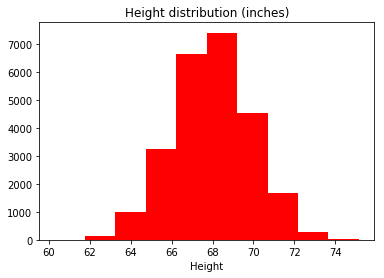

In [9]:
plt.hist(data['Height'], color='r')
plt.xlabel("Height")
plt.title("Height distribution (inches)")

**Task 3:** Output first 10 rows of the dataframe.

In [8]:
data.head(10)

,Index,Height,Weight,BMI
0,0,65.78331,112.9925,18.357573
1,1,71.51521,136.4873,18.762577
2,2,69.39874,153.0269,22.338895
3,3,68.21660,142.3354,21.504526
4,4,67.78781,144.2971,22.077581
5,5,68.69784,123.3024,18.368870
6,6,69.80204,141.4947,20.417428
7,7,70.01472,136.4623,19.571813
8,8,67.90265,112.3723,17.134953
9,9,66.78236,120.6672,19.022290


**Task 4:** Plot histogram of the weight distribution. Make the color green. Label the x-axis, add title to the plot.

Text(0.5, 1.0, 'Weight distribution (lbs)')

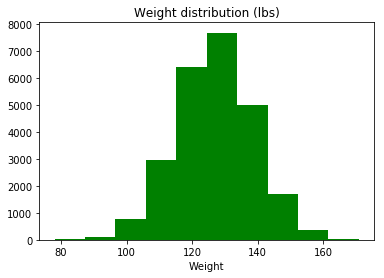

In [10]:
plt.hist(data['Weight'], color='g')
plt.xlabel("Weight")
plt.title("Weight distribution (lbs)")

**Task 5:** Use the method *pairplot* of the module Seaborn to visualize the dependencies in your dataframe.

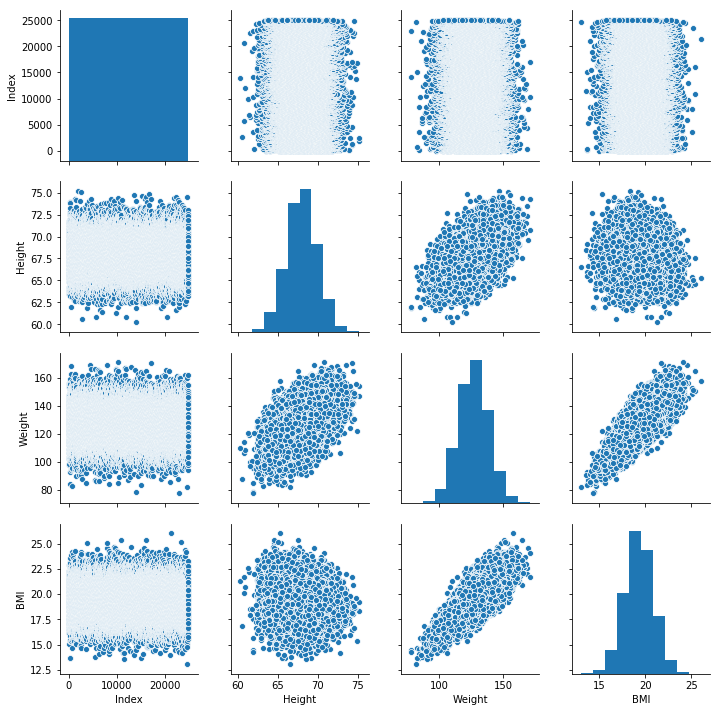

In [11]:
sns.pairplot(data)

In [51]:
data.describe()

,Index,Height,Weight,BMI
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,12499.500000,67.993114,127.079421,19.321455
std,7217.022701,1.901679,11.660898,1.551895
min,0.000000,60.278360,78.014760,13.070826
25%,6249.750000,66.704397,119.308675,18.278284
50%,12499.500000,67.995700,127.157750,19.302198
75%,18749.250000,69.272958,134.892850,20.357657
max,24999.000000,75.152800,170.924000,26.023651


**Task 6**: Bin the weight into 3 bins: 1 - for light weight, 2 - for medium and 3 for large weight. In your dataframe, create a new column *weight_category* and record the weight category for the each row in that column.

In [52]:
des = data.describe()
dif = abs((des['Weight']['min'] - des['Weight']['max']) / 3)
cat1 = des['Weight']['min'] + dif
cat2 = cat1 + dif
cat3 = des['Weight']['max']

wbins = []
for i in range(len(data['Weight'])):
    if data['Weight'][i] <= cat1:
        wbins.append('1')
    elif data['Weight'][i] <= cat2:
        wbins.append('2')
    elif data['Weight'][i] <= cat3:
        wbins.append('3')
#print(wbins[:10])

wbins_df = pd.DataFrame({'col': wbins})
        
data['weight_category'] = wbins_df
data.head(10)

,Index,Height,Weight,BMI,weight_category
0,0,65.78331,112.9925,18.357573,2
1,1,71.51521,136.4873,18.762577,2
2,2,69.39874,153.0269,22.338895,3
3,3,68.21660,142.3354,21.504526,3
4,4,67.78781,144.2971,22.077581,3
5,5,68.69784,123.3024,18.368870,2
6,6,69.80204,141.4947,20.417428,3
7,7,70.01472,136.4623,19.571813,2
8,8,67.90265,112.3723,17.134953,2
9,9,66.78236,120.6672,19.022290,2


**Task 7:**  Use the method *boxplot* from the module Seaborn to visualize height distribution properties for each weight category. Label *y*-axis as "Height",  and *y*-axis as "Weight category"

[Text(0, 0.5, 'Height'), Text(0.5, 0, 'Weight category')]

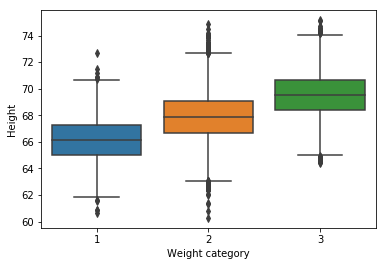

In [56]:
sns.boxplot(x = data['weight_category'], y = data['Height']).set(xlabel = 'Weight category', ylabel = 'Height')

**Task 8:** Make a scatter plot of weight vs height, label the axes and add a title to the plot.

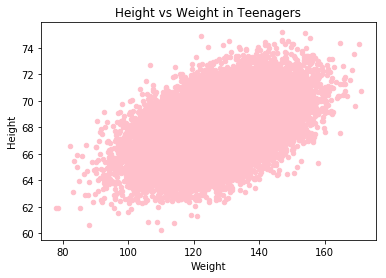

In [61]:
data.plot(y = 'Height', x = 'Weight', kind = 'scatter', color = 'pink', title = 'Height vs Weight in Teenagers')